# Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

___
# Gráficos de distribución

Veamos algunas de las visualizaciones más conocidas de esta librería, que son:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [ ]:
import seaborn as sns
%matplotlib inline

## Datos
Cargamos unos datos que están contenidos en la propia librería:

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## distplot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


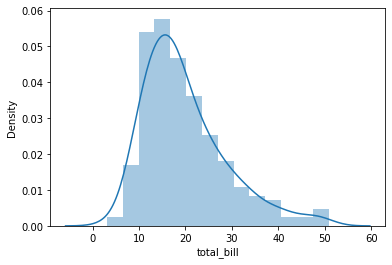

In [ ]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

Podemos también remover la línea de tendencia:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


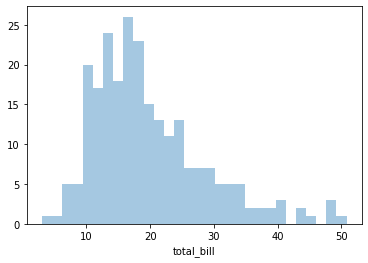

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

Para comparar distribuciones, admite las posibilidades:
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

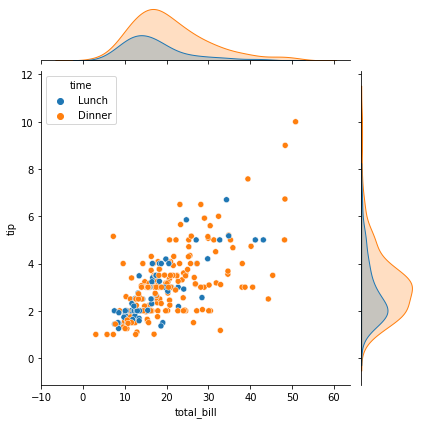

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter',hue= 'time')

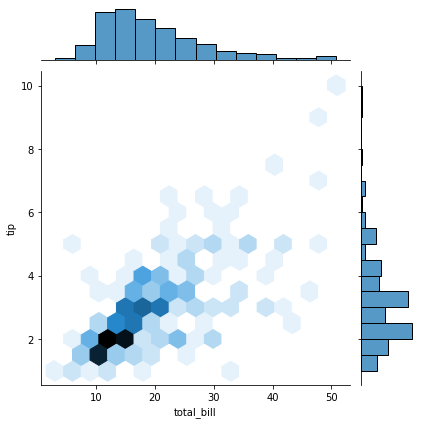

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

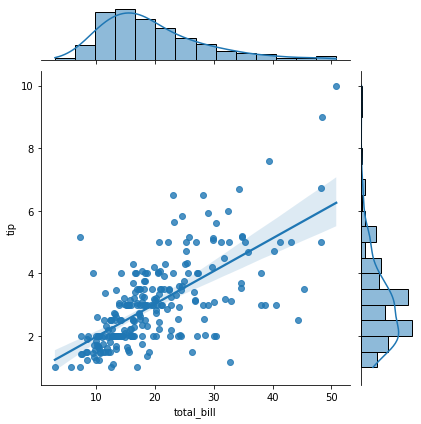

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

Sabemos que jointplot admite una gran variedad de posibilidades. Nos gustaría que practicaseis con estas y nos fueseis capaces de explicar qué hacen exactamente (así como editar un poco los parámetros). 
 
jointplot
Para comparar distribuciones, admite las posibilidades:

- “scatter”: de dispersión

- “reg”: 

- “resid”

- “kde”: densidad de kernel

- “hex”: dispersión hexagonal

- "hist":

Jointplot nos muestra la gráfica de dispersión de dos variables que estemos analizando así como un histograma para cada una de ellas.

El valor por defecto asociado al argumento “kind” es “scatter”.

Otro argumento es “hex”, con el que el plano sobre el que se dispersan nuestros datos se divide en hexágonos y estos se colorean según el número de datos (densidad) que reposen sobre ellos.

En el caso de “hist” hacemos lo mismo que en “hex” pero con cuadrados.

Uno muy importantes es “kde”. La estimación de densidad de Kernel (KDE) es una forma NO PARAMÉTRICA de estimar la función de densidad de probabilidad de una variable aleatoria. Básicamente lo que hace es calcular la densidad de las entidades de punto de alrededor de cada celda (digamos que “genera una superficie curva” con esos puntos).

“reg” nos añade una regresión lineal de los datos (lo de cómo se ajustan a una línea recta) mientras que “resid” nos mostrará los residuos (por así decirlo, “errores” a la hora de ajustar).

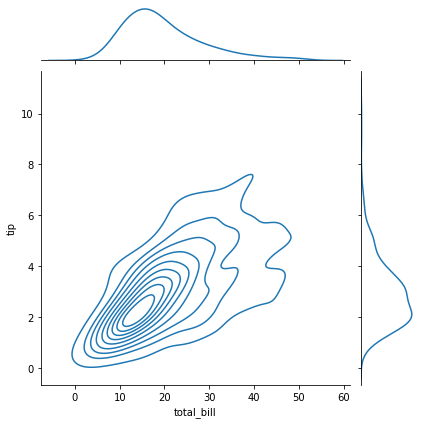

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

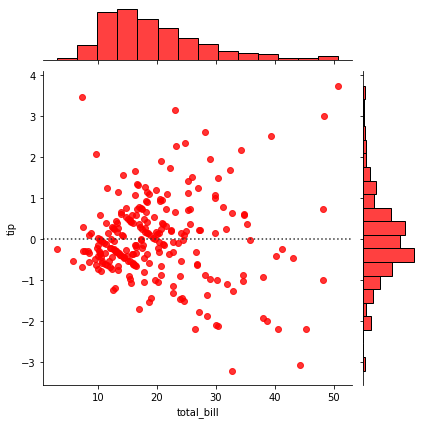

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,color='red',height =6,kind='resid')

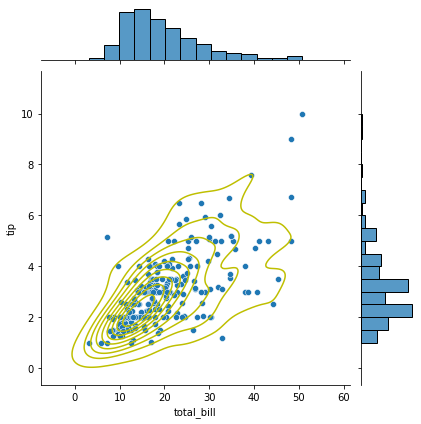

In [ ]:
g= sns.jointplot(x='total_bill',y='tip',data=tips)
g.plot_joint(sns.kdeplot,color='y')

## pairplot

Pairplot permite observar la relación entre tods la variables numéricas de un dataframe, y hacer agregado por alguna de las variables categóricas presentes:

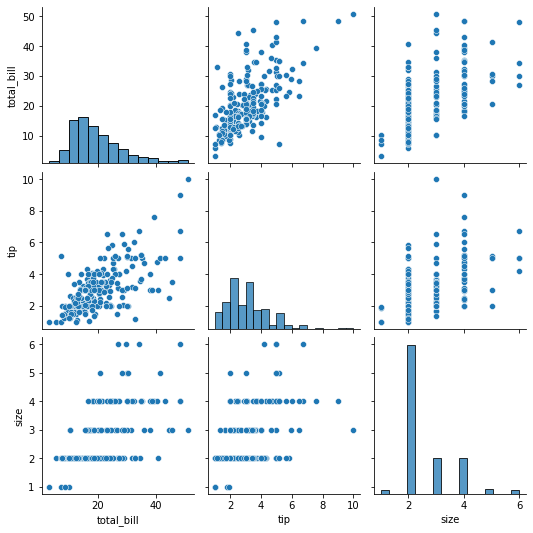

In [ ]:
sns.pairplot(tips)

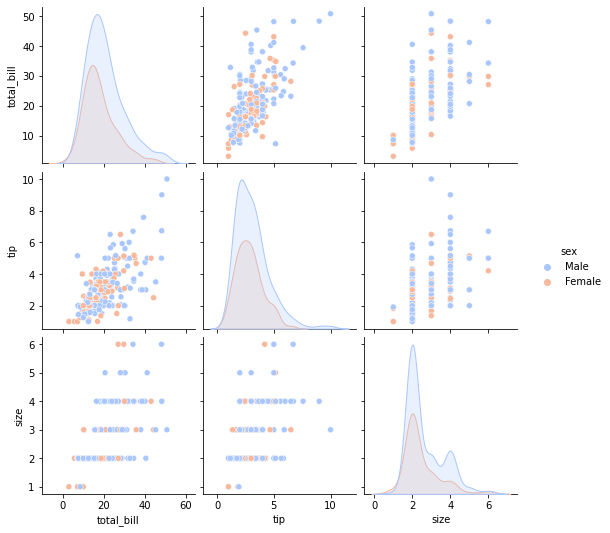

In [ ]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots permiten de manera unidimensional agregar la información de una distribución:

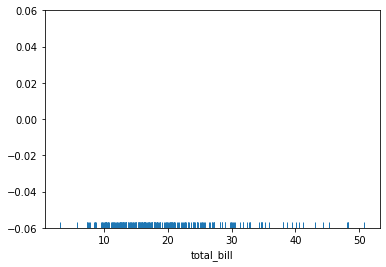

In [ ]:
sns.rugplot(tips['total_bill'])

## kdeplot


kdeplots son [gráficos de estimación de la densidad del kernel] (http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). Estos gráficos de KDE reemplazan cada observación individual con una distribución gaussiana (normal) centrada alrededor de ese valor. Por ejemplo:

(0.0, 1.0)

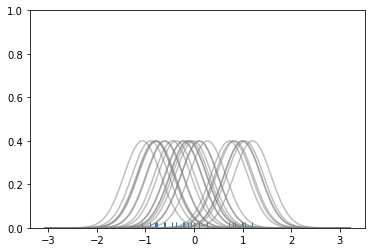

In [ ]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

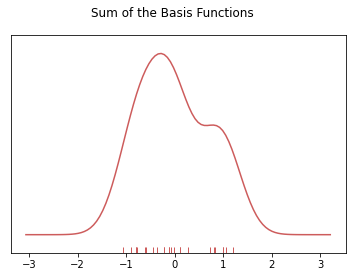

In [58]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

Podemos combinar ambos gráficos para obtener:

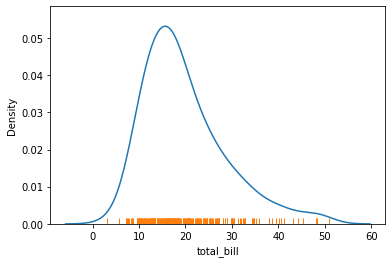

In [59]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

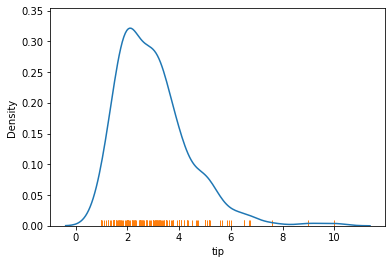

In [60]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

___
# Gráficos de variables categóricas

Veamos cómo representar ahora datos categóricos mediante los métodos:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

In [61]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

Estos gráficos muy similares le permiten obtener datos agregados de una característica categórica en sus datos. **gráfico de barras** es un gráfico general que le permite agregar los datos categóricos en función de alguna función, por defecto la media:

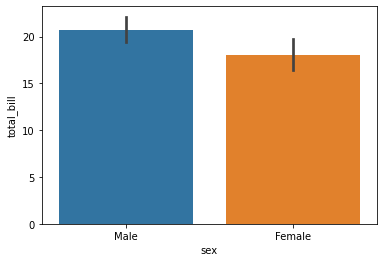

In [62]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [63]:
import numpy as np

Puede cambiar el objeto estimador a su propia función, que convierte un vector en un escalar:

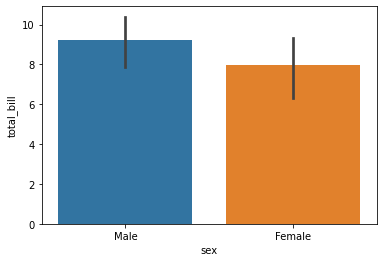

In [65]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

Esto es esencialmente lo mismo que el diagrama de barras, excepto que el estimador cuenta explícitamente el número de ocurrencias. Es por eso que solo pasamos el valor x:

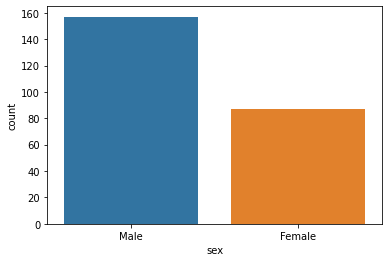

In [66]:
sns.countplot(x='sex',data=tips)

## boxplot y violinplot

Los diagramas de caja y los diagramas de violín se utilizan para mostrar la distribución de datos categóricos. Un diagrama de caja (o diagrama de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto los puntos que se determinan como "valores atípicos" mediante un método que es una función del rango entre cuartiles.

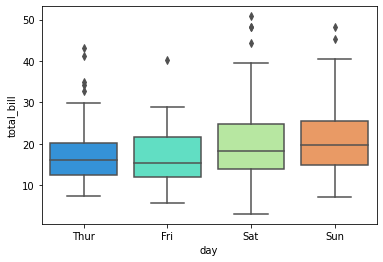

In [67]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

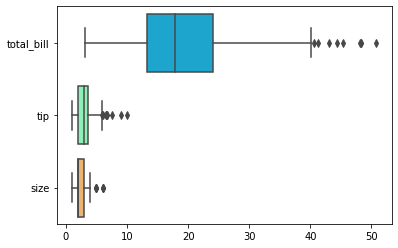

In [68]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

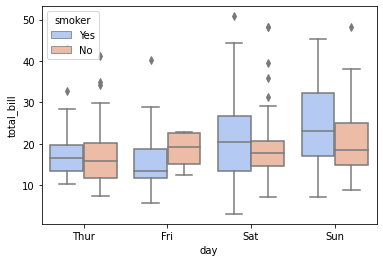

In [70]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse. A diferencia de un diagrama de caja, en el que todos los componentes del diagrama corresponden a puntos de datos reales, el diagrama de violín presenta una estimación de la densidad del núcleo de la distribución subyacente.

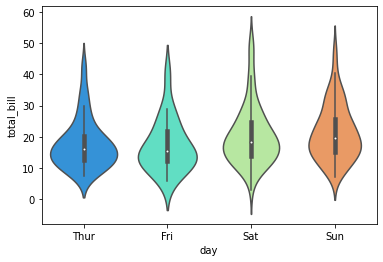

In [71]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

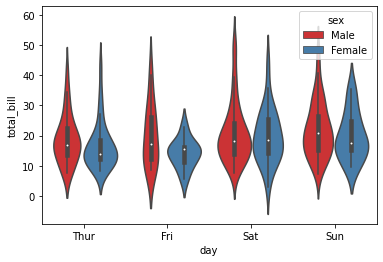

In [72]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

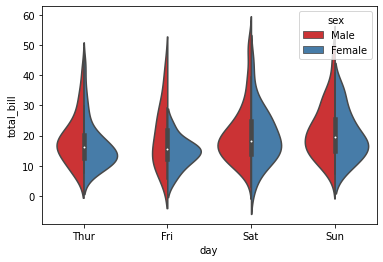

In [73]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

In [74]:
# Trabajemos con la base de datos de pingüinos
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [102]:
pingu = sns.load_dataset('penguins')

In [103]:
pingu

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [104]:
pingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [105]:
pingu.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [100]:
pingu[pingu.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Ahora vamos a trabajar un poco esos datos nulos que nos hemos encontrado. Vamos a optar, en la columna `sex`, rellenar con la moda.

In [106]:
pingu['sex'].mode()[0]

'Male'

In [107]:
pingu['sex'].fillna(pingu['sex'].mode()[0], inplace=True)

# pingu['sex'] = pingu.fillna(pingu.mode(0).iloc[-1])

In [109]:
pingu[pingu.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Male


Ahora, para los pinguinos 4 y 340 vamos a sustituir sus valores numericos (las medidas) por la media. Otra opción sería eliminarlos.

In [111]:
pingu.fillna(pingu.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


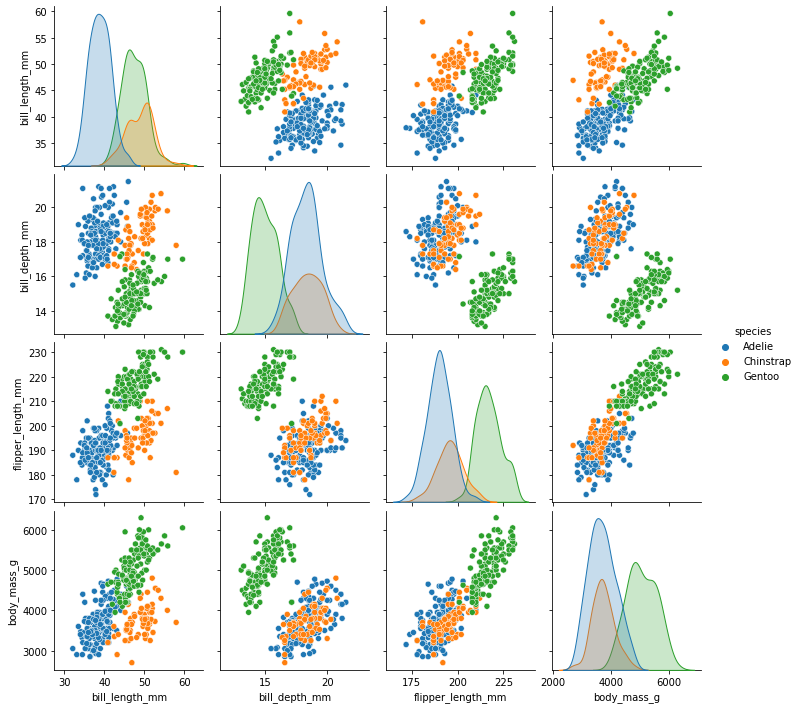

In [119]:
sns.pairplot(pingu, hue='species')

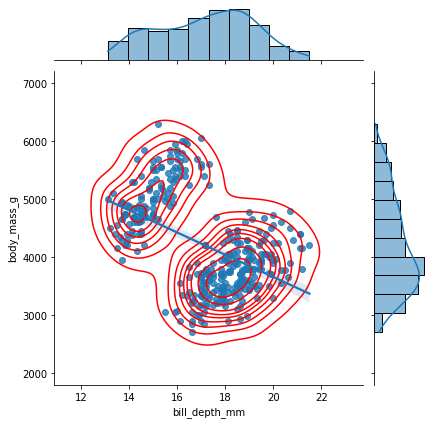

In [126]:
g= sns.jointplot(x='bill_depth_mm',y='body_mass_g',data=pingu,kind='reg')
g.plot_joint(sns.kdeplot,color='r', fill=False)

## stripplot y swarmplot

El stripplot dibujará un diagrama de dispersión donde una variable es categórica. Un diagrama de franjas se puede dibujar por sí solo, pero también es un buen complemento para un diagrama de caja o de violín en los casos en los que desea mostrar todas las observaciones junto con alguna representación de la distribución subyacente.

El swarmplot es similar al stripplot(), pero los puntos se ajustan (solo a lo largo del eje categórico) para que no se superpongan. Esto brinda una mejor representación de la distribución de valores, aunque no se adapta tan bien a un gran número de observaciones (tanto en términos de la capacidad de mostrar todos los puntos como en términos del cálculo necesario para organizarlos).

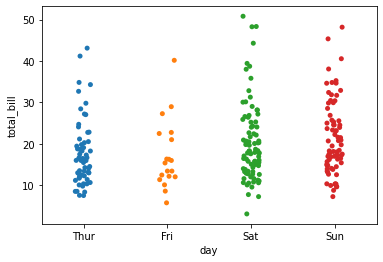

In [127]:
sns.stripplot(x="day", y="total_bill", data=tips)

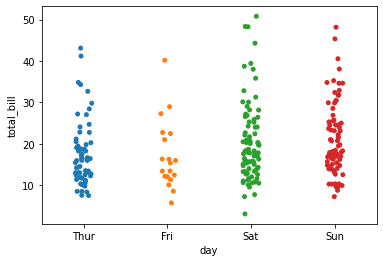

In [128]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

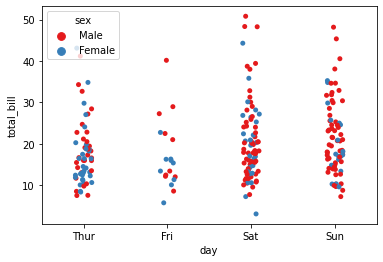

In [130]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


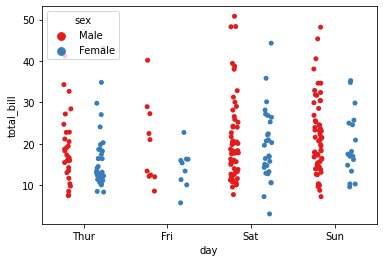

In [131]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

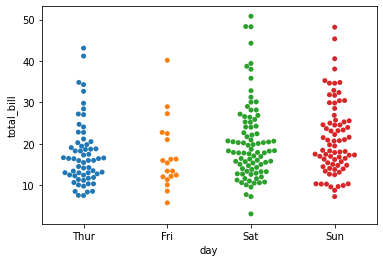

In [132]:
sns.swarmplot(x="day", y="total_bill", data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


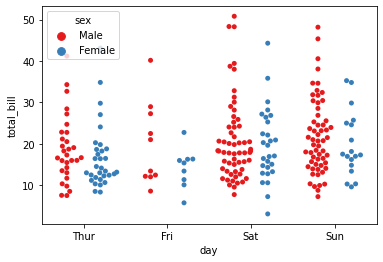

In [133]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combinando gráficos categóricos

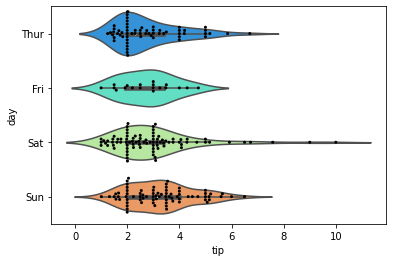

In [134]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot

factorplot es la forma más general de un gráfico categórico. Puede tomar un parámetro **kind** para ajustar el tipo de gráfico:

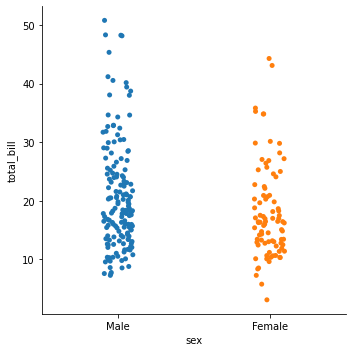

In [137]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='strip')#kind=bar,...

___
# Gráficos de matrices

Los gráficos matriciales le permiten trazar datos como matrices codificadas por colores y también se pueden usar para indicar grupos dentro de los datos (más adelante, en la sección de aprendizaje automático, aprenderemos cómo agrupar datos formalmente).

Comencemos explorando el mapa de calor y el mapa de clutermap de Seaborn:

In [138]:
flights = sns.load_dataset('flights')

In [139]:
tips = sns.load_dataset('tips')

In [140]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [141]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

Para que un mapa de calor funcione correctamente, sus datos ya deberían estar en forma de matriz, la función sns.heatmap básicamente solo los colorea por usted. Por ejemplo:

In [142]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [143]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


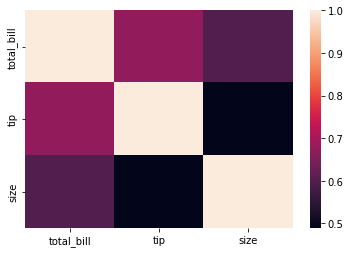

In [144]:
sns.heatmap(tips.corr())

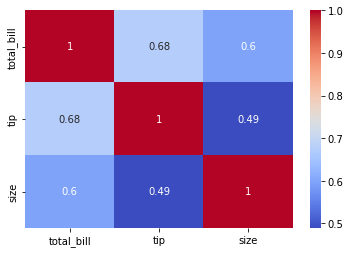

In [145]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Para los datos de vuelos:

In [146]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


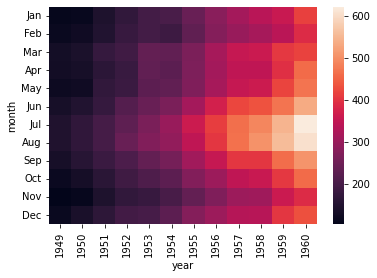

In [147]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

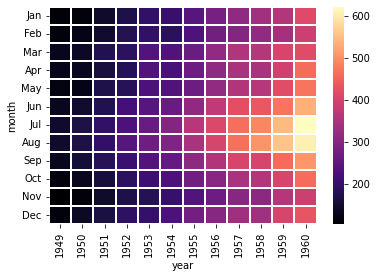

In [148]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

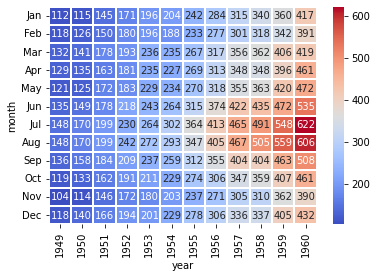

In [149]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'),cmap='coolwarm',annot=True, fmt='d', linewidths=1, linecolor='white')

## clustermap

El clustermap utiliza la agrupación jerárquica para producir una versión agrupada del mapa de calor. Por ejemplo:

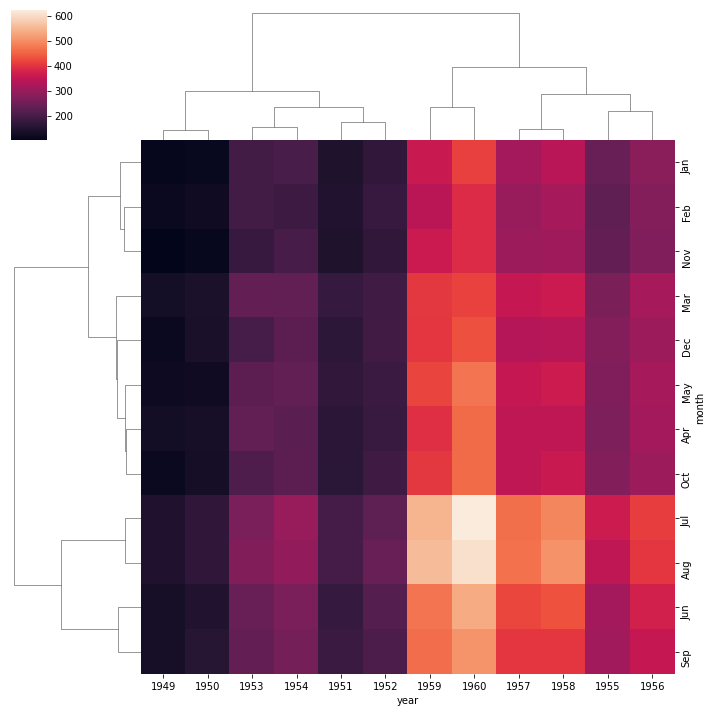

In [150]:
sns.clustermap(pvflights)

Observe ahora cómo los años y los meses ya no están en orden, sino que se agrupan por similitud de valor (recuento de pasajeros). Eso significa que podemos comenzar a inferir cosas de este gráfico, como que agosto y julio son similares (tiene sentido, ya que ambos son meses de viaje de verano)

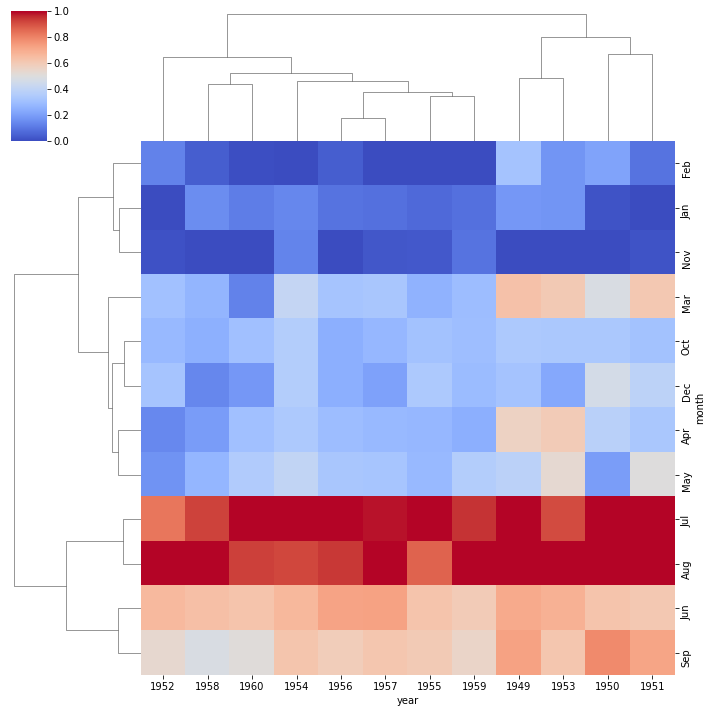

In [153]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

___
# Grids

Las cuadrículas son tipos generales de gráficos que le permiten asignar tipos de gráficos a filas y columnas de una cuadrícula, lo que le ayuda a crear gráficos similares separados por características.

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid es una cuadrícula de subtraza para trazar relaciones por pares en un conjunto de datos.

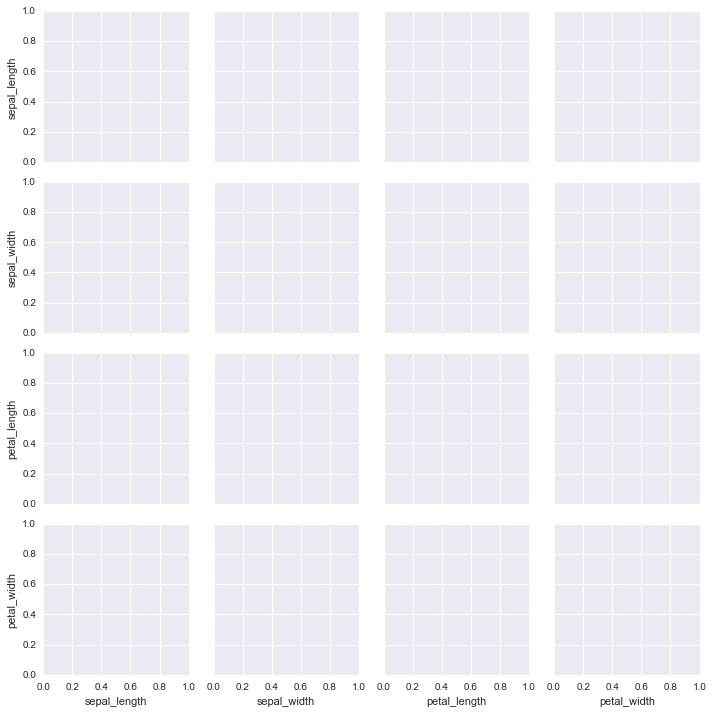

In [ ]:
# Just the Grid
sns.PairGrid(iris)

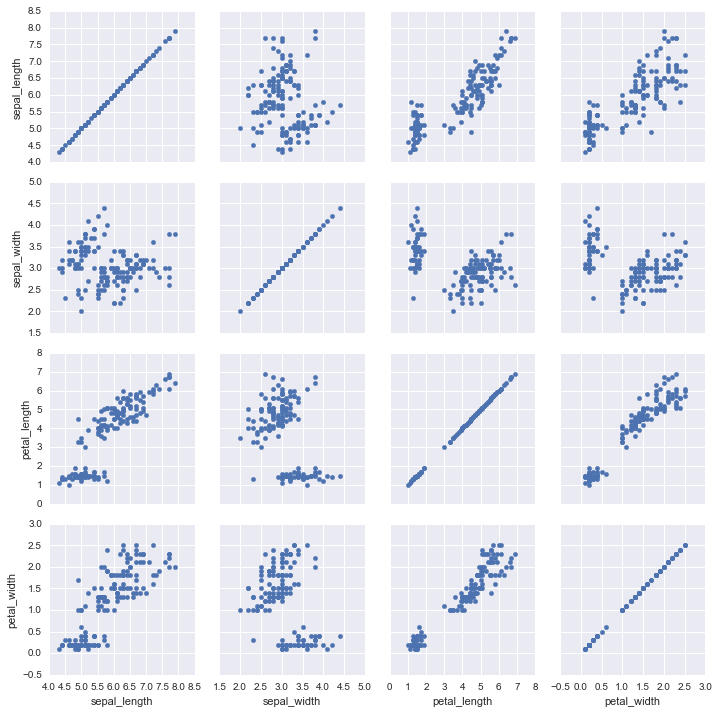

In [ ]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

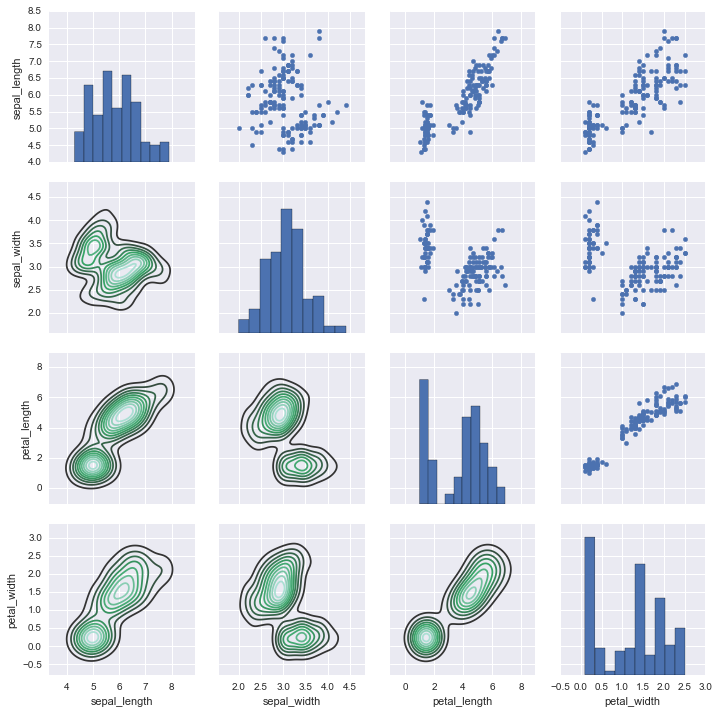

In [ ]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot es una versión más simple de PairGrid (usará con bastante frecuencia)

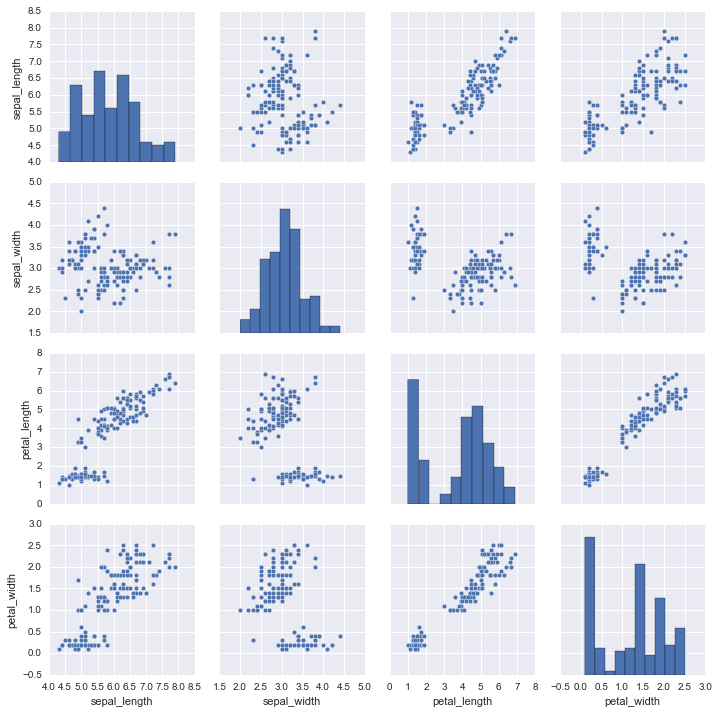

In [ ]:
sns.pairplot(iris)

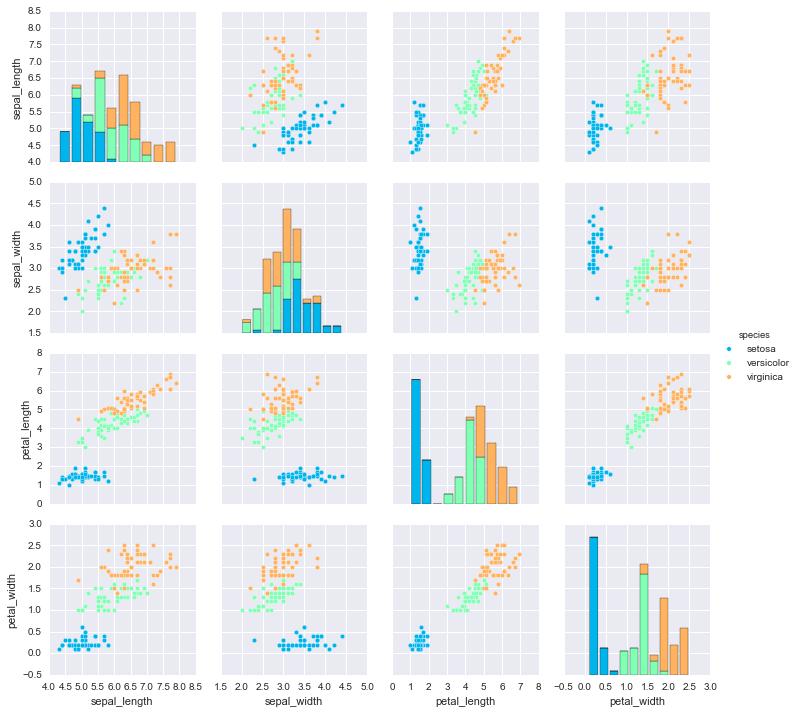

In [ ]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid es la forma general de crear cuadrículas de gráficos basados ​​en una característica:

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


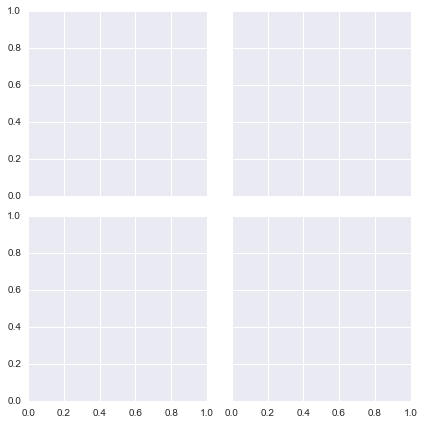

In [ ]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

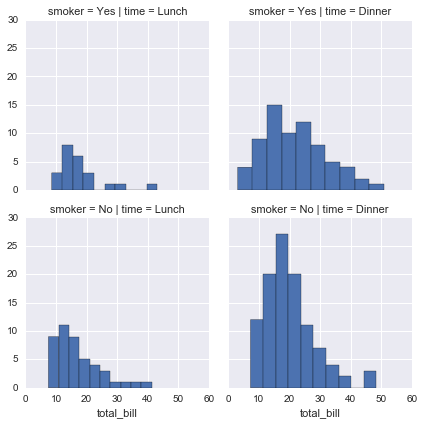

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

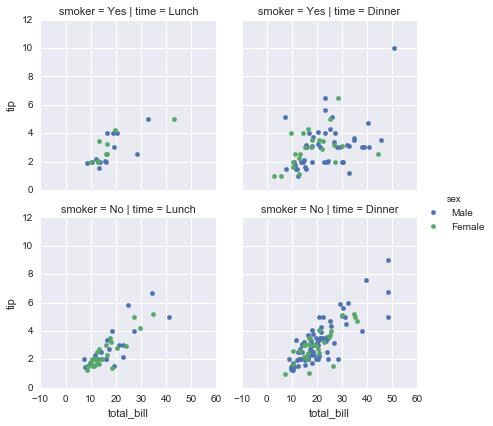

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid es la versión general para grillas de tipo jointplot(), para un ejemplo rápido:

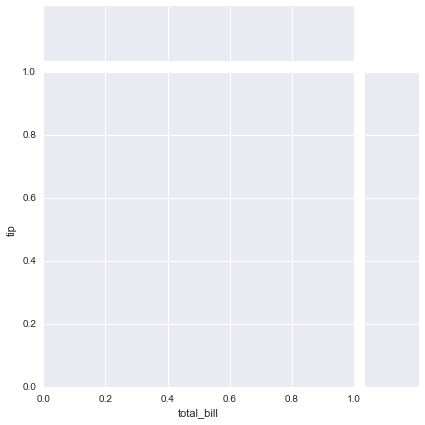

In [ ]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


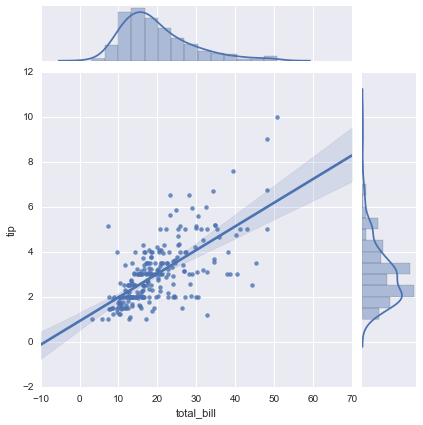

In [ ]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

___
# Gráficos de regresión

Seaborn tiene muchas capacidades integradas para gráficos de regresión, sin embargo, no hablaremos realmente de la regresión hasta la sección de aprendizaje automático del curso, por lo que solo cubriremos la función **lmplot()** por ahora.

**lmplot** le permite mostrar modelos lineales, pero también le permite dividir esos gráficos en función de las características, así como colorear el tono en función de las características.

Exploremos cómo funciona esto:

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

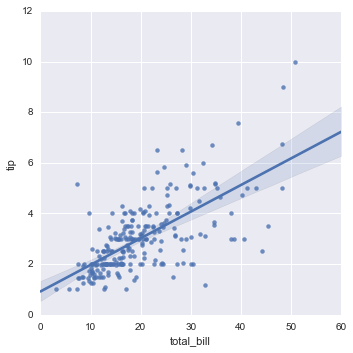

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips)

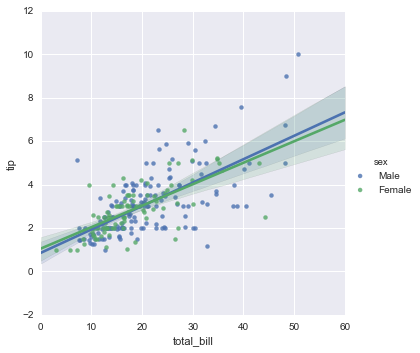

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

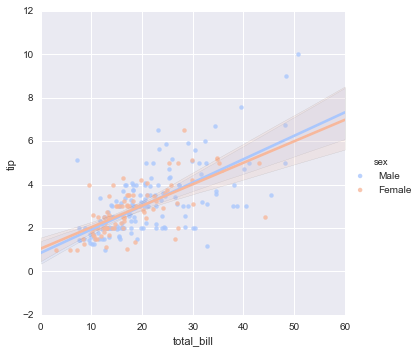

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Trabajando con markers

Los kwargs de lmplot se pasan a **regplot**, que es una forma más general de lmplot(). regplot tiene un parámetro scatter_kws que se pasa a plt.scatter. Entonces, desea establecer el parámetro s en ese diccionario, que corresponde (un poco confuso) al tamaño del marcador al cuadrado. En otras palabras, termina pasando un diccionario con los argumentos base de matplotlib, en este caso, s para el tamaño de un gráfico de dispersión. En general, probablemente no recordará esto de la cabeza, sino que hará referencia a la documentación.

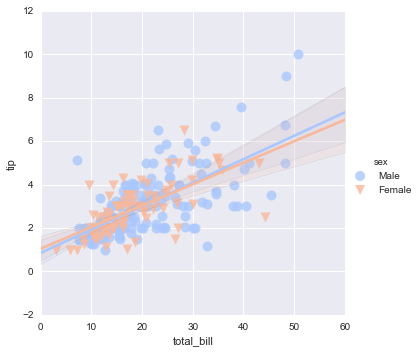

In [ ]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Usndo grids

Podemos agregar más separación variable a través de columnas y filas con el uso de una cuadrícula. Simplemente indique esto con los argumentos col o row:

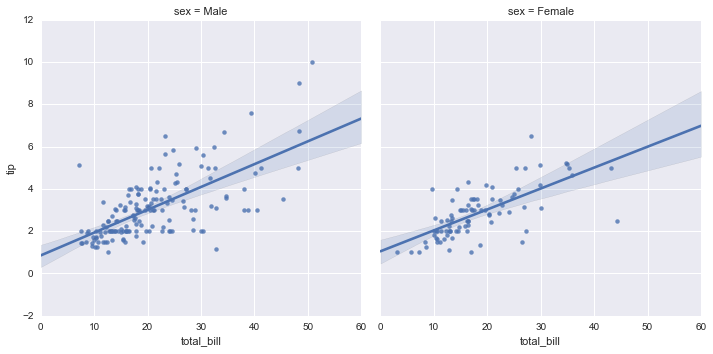

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

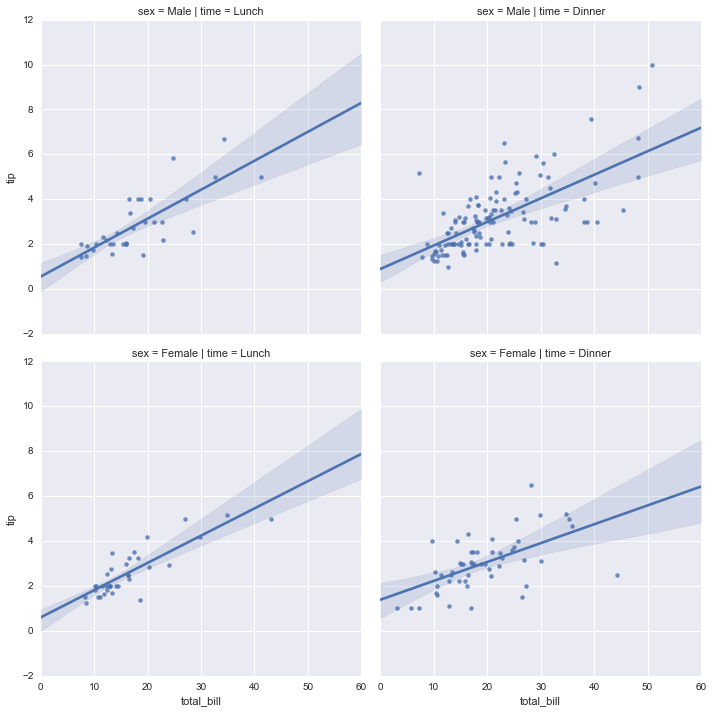

In [ ]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

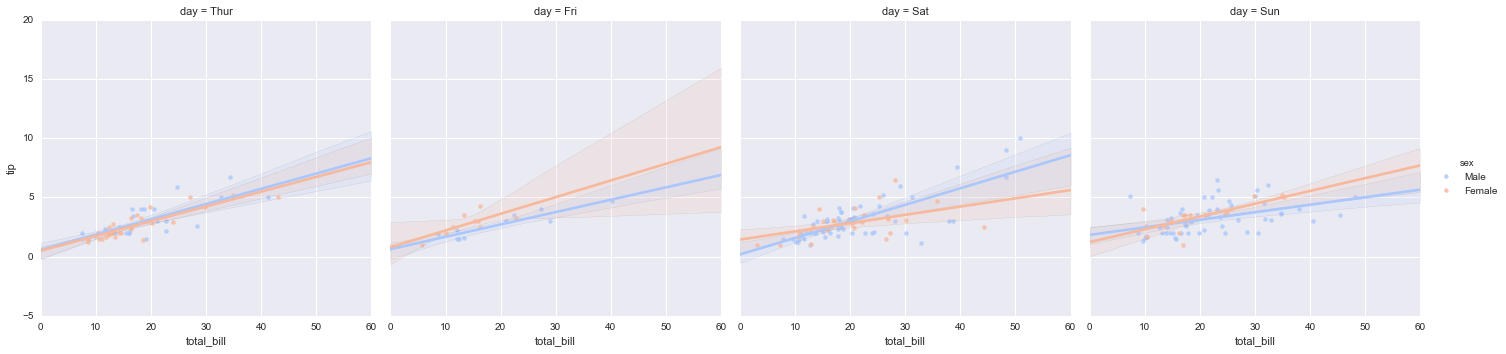

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspecto y tamaño


Las figuras de Seaborn pueden ajustar su tamaño y relación de aspecto con los parámetros de **size** y **aspect**:

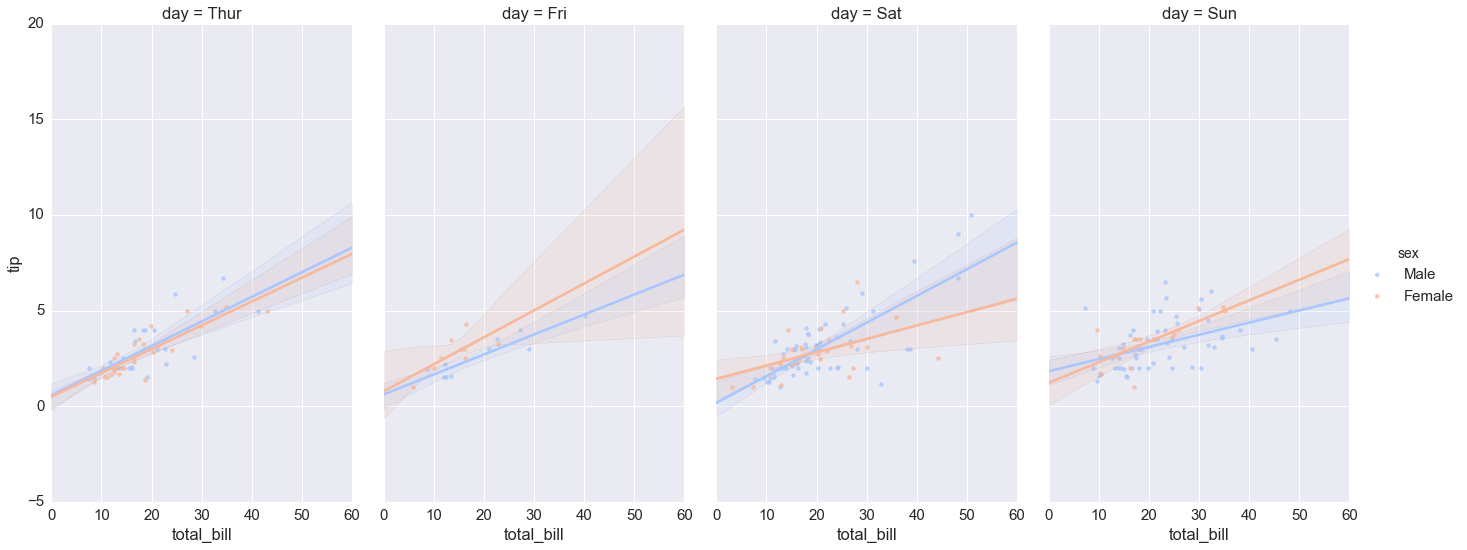

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

___
# Color y estilo

Hemos mostrado algunas veces cómo controlar la estética de la figura en seaborn, pero ahora repasemos esto formalmente:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Estilos

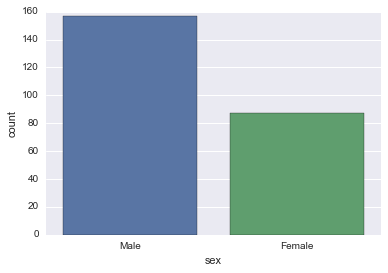

In [ ]:
sns.countplot(x='sex',data=tips)

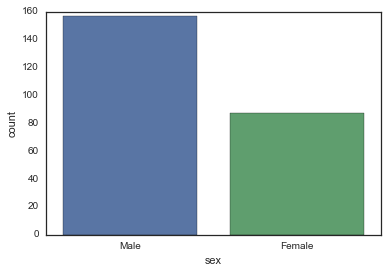

In [ ]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

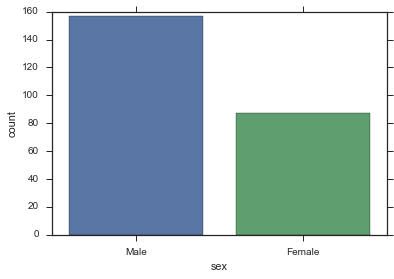

In [ ]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

## Eliminar caja

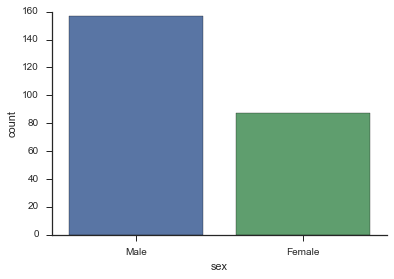

In [ ]:
sns.countplot(x='sex',data=tips)
sns.despine()

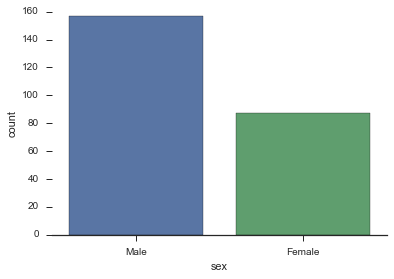

In [ ]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Tamaño y relación de aspecto

Puede usar **plt.figure(figsize=(width,height) ** de matplotlib para cambiar el tamaño de la mayoría de las dibujos de seaborn.

Puede controlar el tamaño y la relación de aspecto de la mayoría de las cuadrículas de seaborn pasando los parámetros: tamaño y aspecto. Por ejemplo:

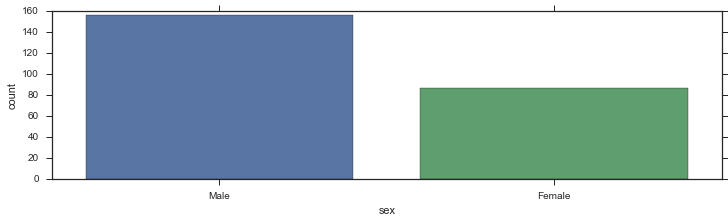

In [ ]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

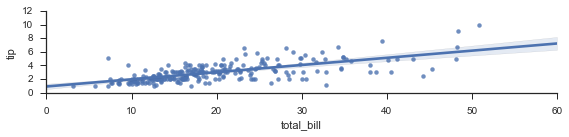

In [ ]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)